# Part 1


### Apply PCA to breast cancer dataset and visualize 2 principle components.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

In [3]:
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X.shape=  (569, 30)
y.shape=  (569,)


In [4]:
pca = PCA(n_components=10)
pca.fit(X_scaled)

print("Eigenvalues:")
print(pca.explained_variance_, "\n")

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100, "\n")

print("EigenVectors")
print(pca.components_)

Eigenvalues:
[13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224
  0.67640888  0.47745625  0.41762878  0.35131087] 

Variances (Percentage):
[44.27202561 18.97118204  9.39316326  6.60213492  5.49576849  4.02452204
  2.25073371  1.5887238   1.38964937  1.16897819] 

EigenVectors
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.

In [5]:
print(sum(pca.explained_variance_ratio_))
pca.explained_variance_ratio_

0.9515688143334997


array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

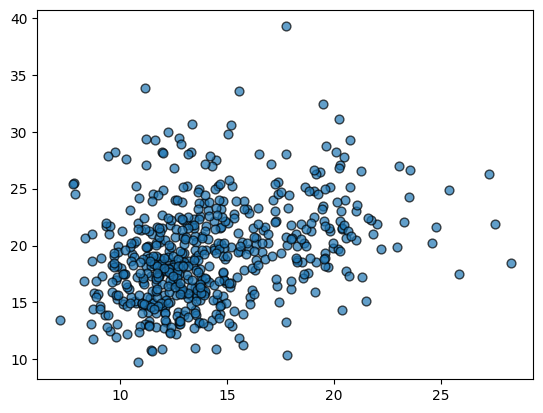

In [6]:
Z = pca.fit_transform(X)

# eigen_vecors= pca.components_ 
# X_approximate = Z @ eigen_vecors
X_approximate = pca.inverse_transform(Z)

plt.figure()
plt.scatter(X_approximate[:,0], X_approximate[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)


# Part 2

### Mine top 10 association rules worth recommending for Groceries dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [8]:
df = pd.read_csv('Groceries_dataset.csv')
df = df.groupby(['Member_number', 'Date'])

# for key, item in df:
#     print(df.get_group(key), "\n\n")

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

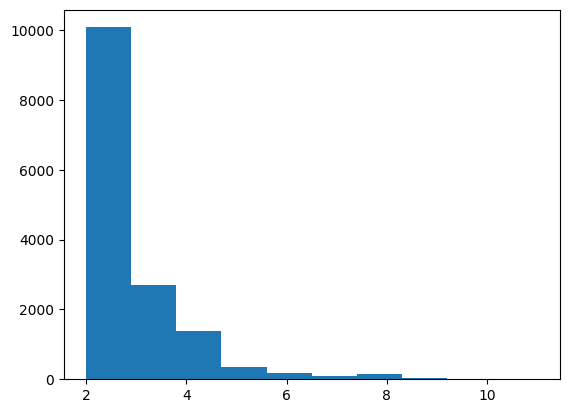

In [9]:
dist = [len(g) for k, g in df]
plt.hist(dist)

In [11]:
prod_stripped = []

for key, item in df:
    temp = df.get_group(key)
    i = temp['itemDescription'].values.tolist()
    prod_stripped.append(i)

# prod_stripped

In [12]:
rules = list(apriori(prod_stripped,
                     min_support=0.02,
                     min_confidence=0.053,
                     min_lift=1,
                     min_length=2))
rules

[RelationRecord(items=frozenset({'bottled water'}), support=0.06068301811134131, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bottled water'}), confidence=0.06068301811134131, lift=1.0)]),
 RelationRecord(items=frozenset({'citrus fruit'}), support=0.05313105660629553, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'citrus fruit'}), confidence=0.05313105660629553, lift=1.0)]),
 RelationRecord(items=frozenset({'other vegetables'}), support=0.12210118291786407, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'other vegetables'}), confidence=0.12210118291786407, lift=1.0)]),
 RelationRecord(items=frozenset({'rolls/buns'}), support=0.11000467820624206, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'rolls/buns'}), confidence=0.11000467820624206, lift=1.0)]),
 RelationRecord(items=frozenset({'root vegetables'}), support=0.06957160997126245, ordered_sta

In [13]:
len(rules)

10

In [14]:
def print_rules(rules):
    for rule in rules:
        print ('rule.items=', list(rule.items))
        print ('rule.support=',rule.support)

        for os in rule.ordered_statistics:
            print ('\titems_base=', list(os.items_base))
            print ('\tlifted_item =', list(os.items_add))
            print ('\tlift=', os.lift)
            print ('\tconfidence (i.e. cond prob {} if {})='.format(list(os.items_add), list(os.items_base)), os.confidence)
            print ('\n')
        
print_rules(rules)

rule.items= ['bottled water']
rule.support= 0.06068301811134131
	items_base= []
	lifted_item = ['bottled water']
	lift= 1.0
	confidence (i.e. cond prob ['bottled water'] if [])= 0.06068301811134131


rule.items= ['citrus fruit']
rule.support= 0.05313105660629553
	items_base= []
	lifted_item = ['citrus fruit']
	lift= 1.0
	confidence (i.e. cond prob ['citrus fruit'] if [])= 0.05313105660629553


rule.items= ['other vegetables']
rule.support= 0.12210118291786407
	items_base= []
	lifted_item = ['other vegetables']
	lift= 1.0
	confidence (i.e. cond prob ['other vegetables'] if [])= 0.12210118291786407


rule.items= ['rolls/buns']
rule.support= 0.11000467820624206
	items_base= []
	lifted_item = ['rolls/buns']
	lift= 1.0
	confidence (i.e. cond prob ['rolls/buns'] if [])= 0.11000467820624206


rule.items= ['root vegetables']
rule.support= 0.06957160997126245
	items_base= []
	lifted_item = ['root vegetables']
	lift= 1.0
	confidence (i.e. cond prob ['root vegetables'] if [])= 0.06957160997126245